Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report. 

In [1]:
%matplotlib inline

from os import environ
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "mock-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = int(environ['taxonomic_level'])

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 10

In [3]:
# Define the subdirectories where the query mock community data should be, and confirm that they exist.
mock_results_dirs = [join(results_dir,"mock-community") for results_dir in results_dirs]

for mock_results_dir in mock_results_dirs:
    assert exists(mock_results_dir), "Mock community result directory doesn't exist: %s" % mock_results_dir


Find mock community pre-computed tables, expected tables, and "query" tables
----------------------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for mock_results_dir in mock_results_dirs:
    results += find_and_process_result_tables(mock_results_dir)

In [5]:
expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)

In [6]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

Evalution 1: Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. 

This is a qualitative evaluation, effectively telling us about the ability of the different methods to report the taxa that are present in each sample. These metrics are not concerned with the abundance of the different taxa.

In [7]:
mock_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)

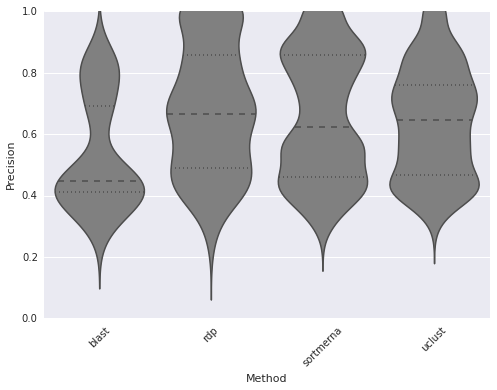

In [8]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Precision")

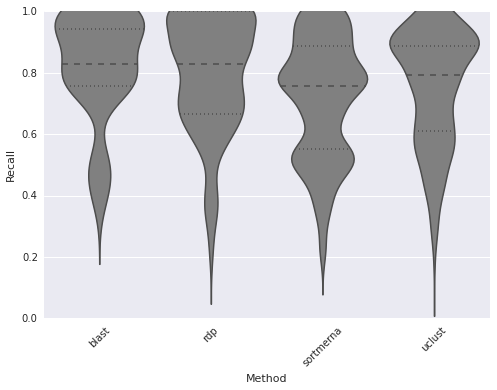

In [9]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Recall")

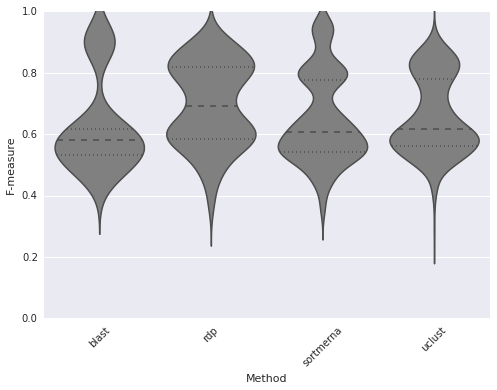

In [10]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="F-measure")

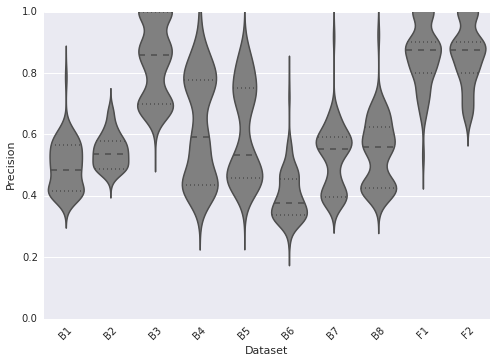

In [11]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Precision")

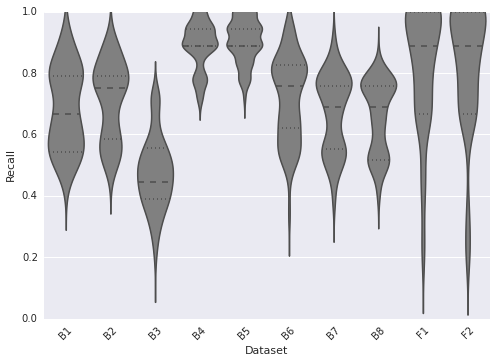

In [12]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Recall")

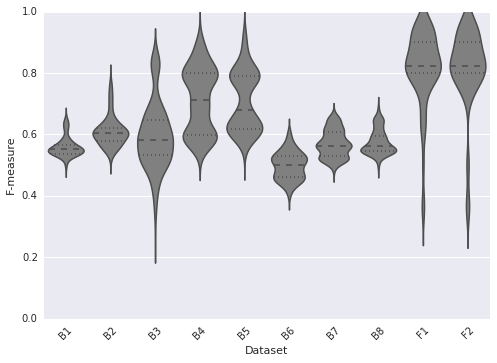

In [13]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


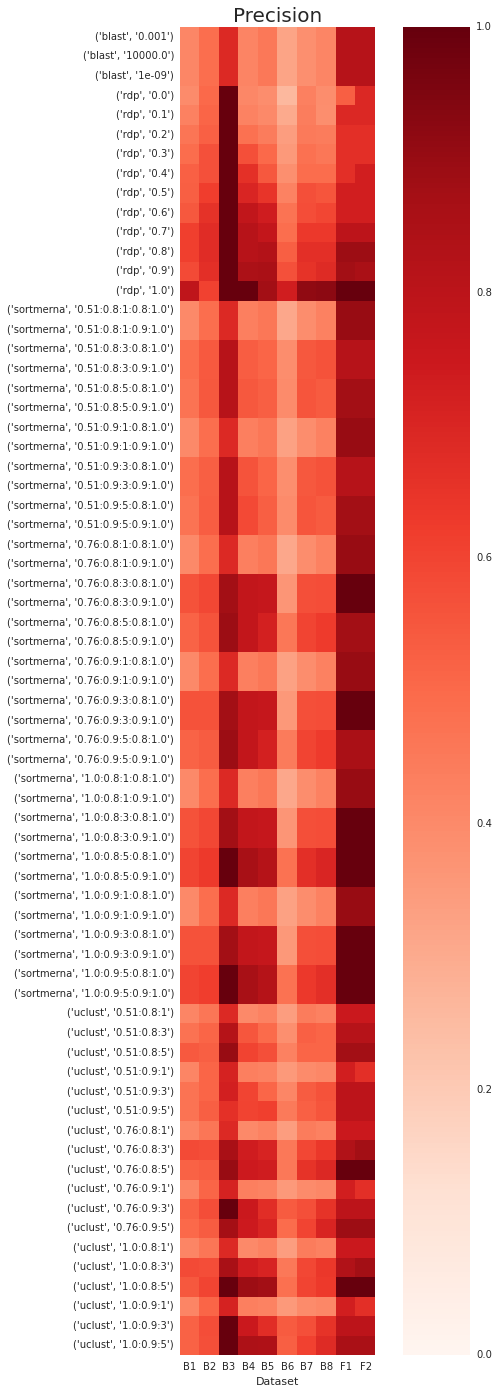

In [14]:
heatmap_from_data_frame(mock_results, "Precision")

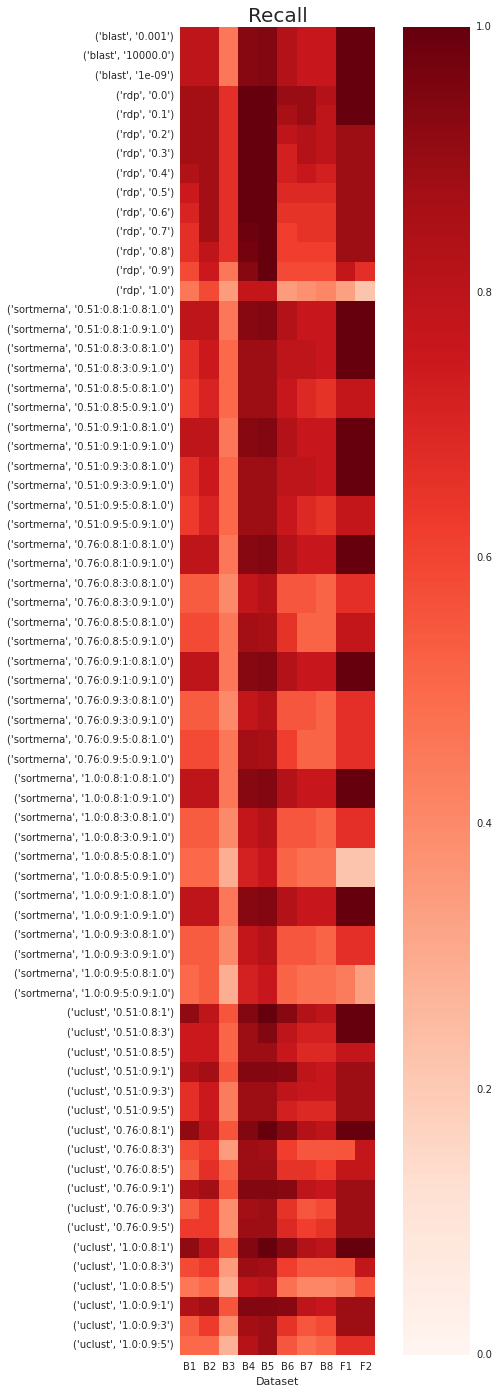

In [15]:
heatmap_from_data_frame(mock_results, "Recall")

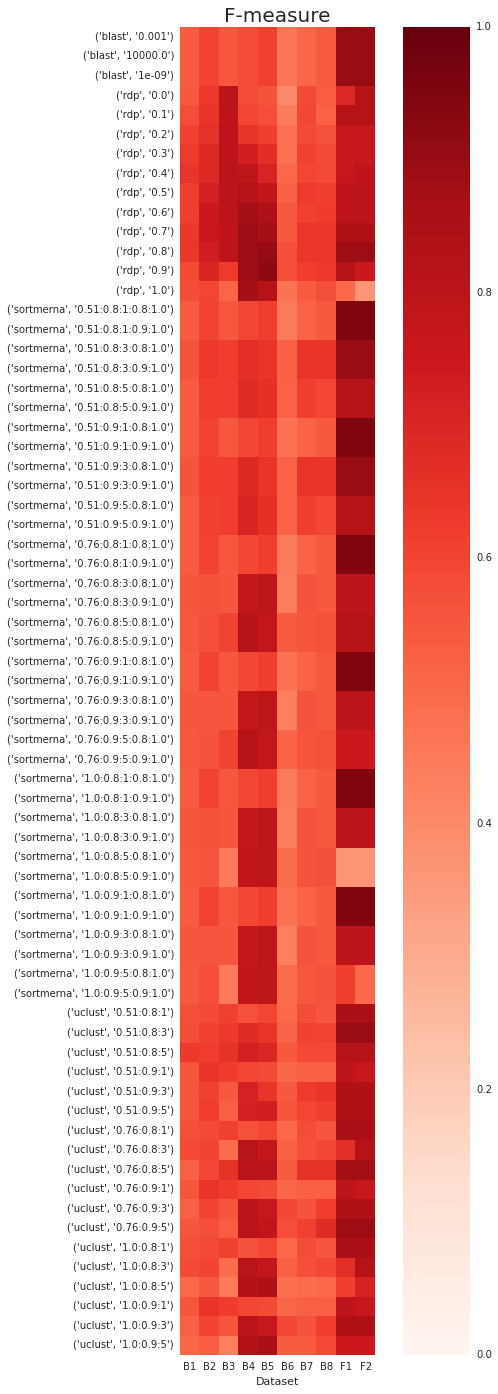

In [16]:
heatmap_from_data_frame(mock_results, "F-measure")

In [17]:
method_by_dataset_a1(mock_results, 'B1')

Method  Precision    Recall  F-measure
1945        rdp   0.526316  0.833333   0.645161
1963     uclust   0.545455  0.750000   0.631579
1928  sortmerna   0.484848  0.666667   0.561404
1941      blast   0.413043  0.791667   0.542857

In [18]:
method_by_dataset_a1(mock_results, 'B2')

Method  Precision    Recall  F-measure
45        rdp   0.677419  0.875000   0.763636
64     uclust   0.512195  0.875000   0.646154
24  sortmerna   0.545455  0.750000   0.631579
38      blast   0.487179  0.791667   0.603175

In [19]:
method_by_dataset_a1(mock_results, 'B3')

Method  Precision    Recall  F-measure
868        rdp   1.000000  0.722222   0.838710
945     uclust   0.909091  0.555556   0.689655
704  sortmerna   0.833333  0.555556   0.666667
832      blast   0.692308  0.500000   0.580645

In [20]:
method_by_dataset_a1(mock_results, 'B4')

Method  Precision    Recall  F-measure
1622        rdp   0.818182  1.000000   0.900000
1656     uclust   0.933333  0.777778   0.848485
1431  sortmerna   0.800000  0.888889   0.842105
1583      blast   0.435897  0.944444   0.596491

In [21]:
method_by_dataset_a1(mock_results, 'B5')

Method  Precision    Recall  F-measure
1127        rdp   0.857143  1.000000   0.923077
1213     uclust   0.842105  0.888889   0.864865
958   sortmerna   0.789474  0.833333   0.810811
1099      blast   0.459459  0.944444   0.618182

In [22]:
method_by_dataset_a1(mock_results, 'B6')

Method  Precision    Recall  F-measure
652     uclust   0.558824  0.655172   0.603175
607        rdp   0.586207  0.586207   0.586207
544  sortmerna   0.475000  0.655172   0.550725
592      blast   0.328767  0.827586   0.470588

In [23]:
method_by_dataset_a1(mock_results, 'B7')

Method  Precision    Recall  F-measure
268     uclust   0.655172  0.655172   0.655172
95   sortmerna   0.547619  0.793103   0.647887
205        rdp   0.633333  0.655172   0.644068
184      blast   0.385965  0.758621   0.511628

In [24]:
method_by_dataset_a1(mock_results, 'B8')

Method  Precision    Recall  F-measure
431     uclust   0.703704  0.655172   0.678571
300  sortmerna   0.564103  0.758621   0.647059
408        rdp   0.633333  0.655172   0.644068
388      blast   0.423077  0.758621   0.543210

In [25]:
method_by_dataset_a1(mock_results, 'F1')

Method  Precision    Recall  F-measure
1726  sortmerna   0.900000  1.000000   0.947368
1810      blast   0.818182  1.000000   0.900000
1889     uclust   0.818182  1.000000   0.900000
1846        rdp   0.888889  0.888889   0.888889

In [26]:
method_by_dataset_a1(mock_results, 'F2')

Method  Precision    Recall  F-measure
1321  sortmerna   0.900000  1.000000   0.947368
1336      blast   0.818182  1.000000   0.900000
1413     uclust   0.818182  1.000000   0.900000
1368        rdp   0.888889  0.888889   0.888889

Evaluation 2: Compute and summarize correlations between observed and known mock community structure
----------------------------------------------------------------------------------------------------

In this evaluation, we compute and summarize the correlation between each result (pre-computed and query) and the known composition of the mock communities. We then summarize the results in two ways: first with a series of boxplots of correlation coefficients by method; and second with a table of the top methods based on their Pearson correlation coefficient. 

This is a quantitative evaluation, which tells us about the ability of the different methods to report the taxa that are present in each sample and accurately assess their abundance. Because many factors can affect the observed abundance of taxa beyond the accuracy of the taxonomic assigner (e.g., primer bias), the correlation coefficients are frequently low, but we expect that their relative values are informative in understanding which taxonomic assigners are more correct than others.

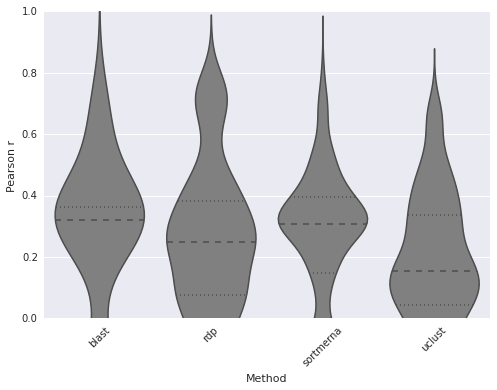

In [27]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Pearson r")

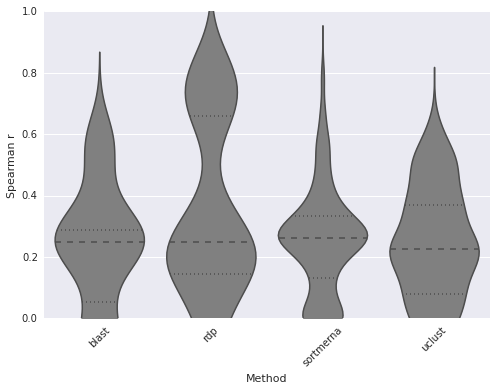

In [28]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Spearman r")

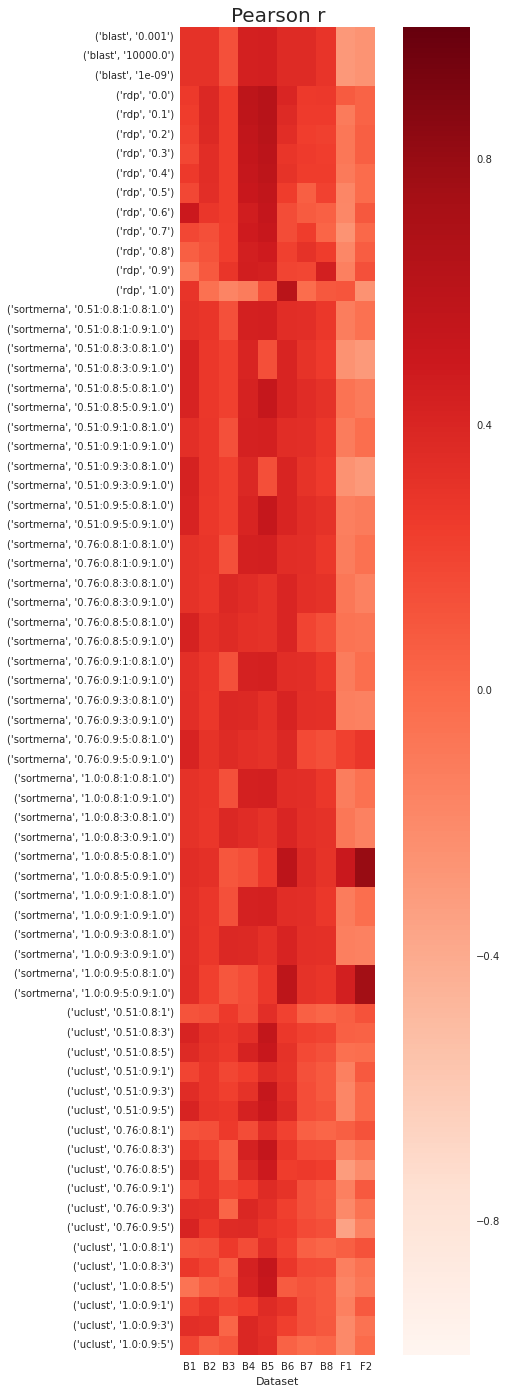

In [29]:
heatmap_from_data_frame(mock_results, "Pearson r", vmin=-1, vmax=1)

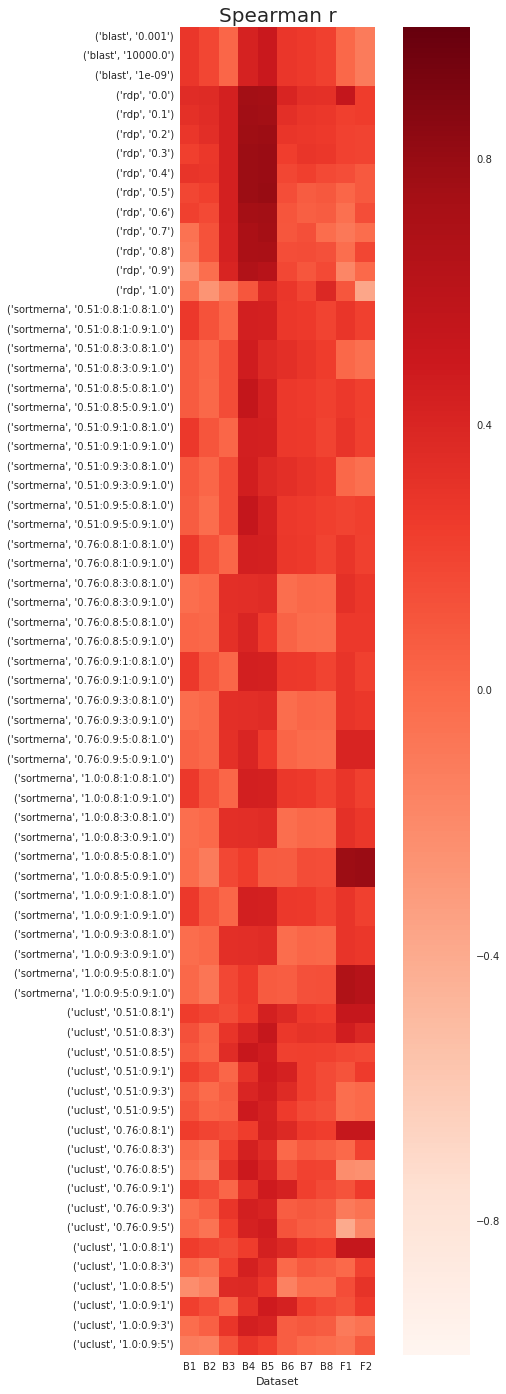

In [30]:
heatmap_from_data_frame(mock_results, "Spearman r", vmin=-1, vmax=1)

In [31]:
method_by_dataset_a2(mock_results, 'B1')

Method  Pearson r  Spearman r
1951        rdp   0.492432    0.224209
1926  sortmerna   0.427801    0.025267
1957     uclust   0.420186    0.022006
1942      blast   0.315401    0.282652

In [32]:
method_by_dataset_a2(mock_results, 'B2')

Method  Pearson r  Spearman r
46        rdp   0.389732    0.361728
63     uclust   0.326790    0.041967
34  sortmerna   0.323416   -0.109105
38      blast   0.319818    0.190336

In [33]:
method_by_dataset_a2(mock_results, 'B3')

Method  Pearson r  Spearman r
895     uclust   0.490002    0.280213
711  sortmerna   0.474102    0.409557
855        rdp   0.436234    0.538126
831      blast   0.413196    0.194604

In [34]:
method_by_dataset_a2(mock_results, 'B4')

Method  Pearson r  Spearman r
1612        rdp   0.746927    0.657288
1477  sortmerna   0.583509    0.340985
1577      blast   0.570197    0.327874
1665     uclust   0.551796    0.424479

In [35]:
method_by_dataset_a2(mock_results, 'B5')

Method  Pearson r  Spearman r
1120        rdp   0.749343    0.659045
994   sortmerna   0.697297    0.377845
1098      blast   0.696939    0.441326
1206     uclust   0.691067    0.475782

In [36]:
method_by_dataset_a2(mock_results, 'B6')

Method  Pearson r  Spearman r
597        rdp   0.707399    0.269118
579  sortmerna   0.629615    0.079438
591      blast   0.418284    0.281065
644     uclust   0.396180    0.270816

In [37]:
method_by_dataset_a2(mock_results, 'B7')

Method  Pearson r  Spearman r
170  sortmerna   0.390591    0.157909
182      blast   0.385094    0.274979
213        rdp   0.336938    0.145185
267     uclust   0.272136    0.195480

In [38]:
method_by_dataset_a2(mock_results, 'B8')

Method  Pearson r  Spearman r
402        rdp   0.481139    0.158537
336  sortmerna   0.345481    0.001556
387      blast   0.326125    0.234439
471     uclust   0.241569    0.216225

In [39]:
method_by_dataset_a2(mock_results, 'F1')

Method  Pearson r  Spearman r
1802  sortmerna   0.516650    0.777401
1822        rdp   0.144900    0.106511
1889     uclust   0.063625    0.478448
1810      blast  -0.279793    0.054822

In [40]:
method_by_dataset_a2(mock_results, 'F2')

Method  Pearson r  Spearman r
1327  sortmerna   0.815529    0.818317
1355        rdp   0.252542    0.055511
1412     uclust   0.169874    0.531580
1334      blast  -0.221546   -0.104660